In [1]:
import pandas as pd

ur1 = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Classification/Diabetes_Data.csv'
data = pd.read_csv(ur1)
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,男生,1
1,66,102,128.1,女生,1
2,59,65,103.9,男生,0
3,46,117,94.8,女生,0
4,45,79,57.8,男生,0
...,...,...,...,...,...
395,72,63,97.1,女生,0
396,22,117,156.7,女生,1
397,31,76,119.0,男生,0
398,36,65,96.3,女生,1


In [2]:
data['Gender'] = data['Gender'].map({'男生': 1, '女生':0})
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


In [3]:
from sklearn.model_selection import train_test_split #分測試集和訓練集

x = data[['Age', 'Weight', 'BloodSugar', 'Gender']]#先把x,y分出來

y = data["Diabetes"]



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 87) #第一個參數傳入特徵x 第二個參數傳入y 後面那0.2會自動把2成分出來當測試集 這會回傳4個值
#random_state= 87 是讓他分割的時候固定 只要是87 就不管分割幾次結果都會一樣


x_train = x_train.to_numpy()  #轉換成numpy的格式 就是矩陣 後續計算會方便
x_test = x_test.to_numpy()

y_train, y_test

(221    1
 52     0
 99     0
 367    1
 248    1
       ..
 6      0
 251    0
 143    0
 187    0
 333    0
 Name: Diabetes, Length: 320, dtype: int64,
 344    1
 34     0
 194    0
 249    1
 71     0
       ..
 92     0
 299    0
 228    0
 16     1
 184    0
 Name: Diabetes, Length: 80, dtype: int64)

In [4]:
from sklearn.preprocessing import StandardScaler #特徵縮放
scaler = StandardScaler()

scaler.fit(x_train) #只能讓他看訓練集的資料 不能給他看測試集的資料 這邊會算出來標準差和平均 此結果也會用在測試集上
x_train = scaler.transform(x_train) #做轉換
x_test = scaler.transform(x_test) #測試集就不用再額外去算測試集的標準差or平均 會直接使用訓練集擬合出來的結果

x_test

array([[ 1.4964114 ,  0.95077942,  1.01425033, -1.06458129],
       [ 1.43615575, -0.2915795 ,  0.06547324, -1.06458129],
       [ 1.67717835, -0.67713916, -2.28906075,  0.93933644],
       [-1.63688239,  1.12213927,  0.23520859,  0.93933644],
       [-1.09458154,  0.99361938, -0.27834966,  0.93933644],
       [ 1.67717835, -1.44825849, -0.86589511,  0.93933644],
       [ 0.05027581, -1.40541853, -0.0346271 , -1.06458129],
       [ 1.79768965,  0.26534002,  1.90644898, -1.06458129],
       [-1.21509284,  1.07929931, -0.07814898,  0.93933644],
       [ 0.89385491,  0.73657961,  1.27973383,  0.93933644],
       [-1.33560414, -0.2915795 ,  0.45281801,  0.93933644],
       [-1.21509284,  0.00830024, -0.7179207 , -1.06458129],
       [-0.25100244, -0.07737968, -2.03663381,  0.93933644],
       [-0.13049114,  1.07929931, -0.49160689, -1.06458129],
       [ 0.65283231,  1.50769894,  0.38753519,  0.93933644],
       [ 0.83359926, -0.2915795 , -0.09990993, -1.06458129],
       [ 0.59257666, -0.

In [5]:
import numpy as np

def sigmoid (z):
  return 1/(1+np.exp(-z))

In [6]:

w = np.array([1,2,3,4]) #先隨便設設
b = 1 #先隨便設設

z = (w*x_train).sum(axis = 1) + b  #多元線性回歸的樣子
y_pred = sigmoid(z) #把多元線性迴歸彎曲

# -y*log(y_pred) - (1-y)*log(1-y_pred) 我們要用的公式

cost = -y_train * np.log(y_pred) - (1-y_train) * np.log(1-y_pred)
cost.mean()

1.3959515636868534

In [7]:
def compute_cost(x, y, w, b):
  z = (w*x).sum(axis = 1) + b  #多元線性回歸的樣子
  y_pred = sigmoid(z) #把多元線性迴歸彎曲

  cost = -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
  cost = cost.mean()
  return cost

In [8]:
w = np.array([1,4,2,4]) #先隨便設設
b = 2 #先隨便設設

compute_cost(x_train, y_train, w, b)

1.9542777292019753

In [9]:
z = (w*x_train).sum(axis = 1) + b
y_pred = sigmoid(z) # y_pred新的計算方式

b_gradient = (y_pred - y_train).mean()
w_gradient = np.zeros(x_train.shape[1]) #創建一個空矩陣 把四個斜率放在一起

for i in range(x_train.shape[1]):
  w_gradient[i] = (x_train[:,i] *(y_pred - y_train)).mean()

w_gradient, b_gradient

(array([ 0.04176112,  0.13246515, -0.12945482,  0.21952511]),
 0.29409673395976715)

In [10]:
def compute_gradient(x, y, w, b):
  z = (w*x).sum(axis = 1) + b
  y_pred = sigmoid(z) # y_pred新的計算方式
  w_gradient = np.zeros(x.shape[1]) #創建一個空矩陣 把四個斜率放在一起
  b_gradient = (y_pred - y).mean()
  for i in range(x.shape[1]):
    w_gradient[i] = (x[:,i] *(y_pred - y)).mean()

  return w_gradient, b_gradient

In [11]:
w = np.array([1,2,2,3]) #先隨便設設
b = 5 #先隨便設設

compute_gradient(x_train, y_train, w, b)

(array([ 0.02951124, -0.00123345, -0.20911372,  0.15024735]),
 0.518806798216479)

In [12]:
learning_rate = 1
w = np.array([1,2,2,3])
b = 5

w_gradient, b_gradient = compute_gradient(x_train, y_train, w, b)
print(compute_cost(x_train, y_train, w, b)) #看cost有無變小 更新前看一次

w = w - w_gradient * learning_rate #更新w方向的斜率
b = b - b_gradient * learning_rate

w, b
print(compute_cost(x_train, y_train, w, b)) #更新後看一次

2.8154062345431683
2.487342502355539


In [13]:
# 讓他不斷更新斜率
np.set_printoptions(formatter = {'float': '{: .2e}'.format}) #更改numpy的格式 =下面.2e的意思

def gradient_descent(x, y, a_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter = 1000):

  c_hist = [] #這三個列表就是拿來儲存 我們跑的每一次裡面的cost a and b 值
  a_hist = []
  b_hist = []

  a = a_init
  b = b_init

  for i in range(run_iter):
    a_gradient, b_gradient = gradient_function(x,y,a,b) #得到a,b斜率

    a = a - a_gradient*learning_rate # 得到更新後的a斜率
    b = b - b_gradient*learning_rate # 得到更新後的b斜率
    cost = cost_function(x,y,a,b)


    a_hist.append(a)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f'Ieration {i: 6}: Cost: {cost: .4e}, a: {a}, b: {b: .2e}, a_gradient: {a_gradient}, b_gradient: {b_gradient: .2e}') # cost那邊的.2f是指只取到小數點後兩位/ i:6 是指佔用6格 這樣比較整齊

  return a, b, a_hist, b_hist, c_hist

In [14]:
w_init = np.array([1, 2, 2, 3])
b_init = 5
learning_rate = 1
run_iter = 10000


w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Ieration      0: Cost:  2.4873e+00, a: [ 9.70e-01  2.00e+00  2.21e+00  2.85e+00], b:  4.48e+00, a_gradient: [ 2.95e-02 -1.23e-03 -2.09e-01  1.50e-01], b_gradient:  5.19e-01
Ieration   1000: Cost:  2.3005e-01, a: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, a_gradient: [ 5.36e-07  1.44e-06 -7.74e-06  4.51e-07], b_gradient:  3.32e-06
Ieration   2000: Cost:  2.3005e-01, a: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, a_gradient: [ 4.40e-10  1.18e-09 -6.36e-09  3.70e-10], b_gradient:  2.73e-09
Ieration   3000: Cost:  2.3005e-01, a: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, a_gradient: [ 3.61e-13  9.73e-13 -5.22e-12  3.04e-13], b_gradient:  2.24e-12
Ieration   4000: Cost:  2.3005e-01, a: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, a_gradient: [ 2.98e-16  8.01e-16 -4.30e-15  2.44e-16], b_gradient:  1.92e-15
Ieration   5000: Cost:  2.3005e-01, a: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, a_gradient: [ 1.94e-17  2.36e-17 -4.33e

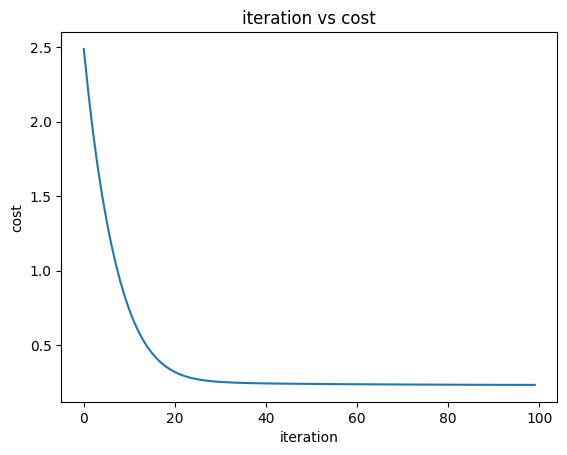

In [15]:
# cost下降的過程把它畫出來
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,100), c_hist[:100]) #前面是x軸 後面是y軸 且看前一百次的更新資料

plt.title('iteration vs cost')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

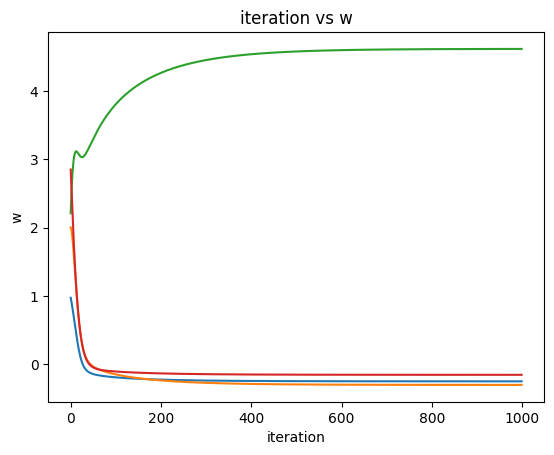

In [16]:
# 畫出w 更新的過程
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,1000), w_hist[:1000]) #前面是x軸 後面是y軸 且看前一百次的更新資料

plt.title('iteration vs w')
plt.xlabel('iteration')
plt.ylabel('w')
plt.show()

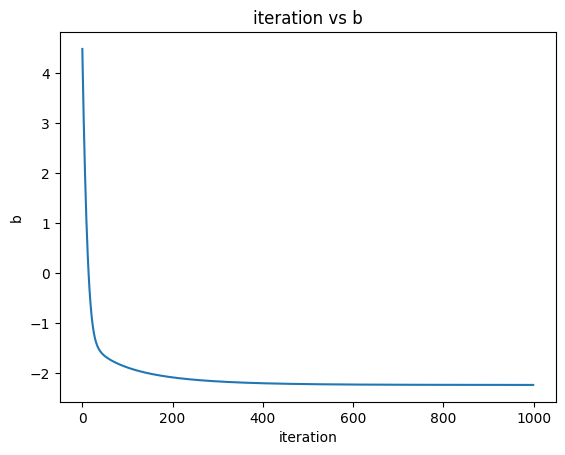

In [17]:
# 畫出b 更新的過程
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,1000), b_hist[:1000]) #前面是x軸 後面是y軸 且看前一百次的更新資料

plt.title('iteration vs b')
plt.xlabel('iteration')
plt.ylabel('b')
plt.show()

In [18]:
w_final, b_final

(array([-2.53e-01, -3.06e-01,  4.62e+00, -1.58e-01]), -2.2423167596289706)

In [19]:
z = (w_final * x_test).sum(axis = 1) + b_final
y_pred = sigmoid(z)

y_pred = np.where(y_pred >0.5, 1, 0) #這樣寫會去找y_pred裡面的所有值 如果預測出來的值的大於0.5 就當作有糖尿病 所以使其變為1 反之等於0
(y_pred == y_test).sum() #預測的結果跟真實的結果相不相等 寫sum是要讓他把True的加總起來 看有多少個
acc = (y_pred == y_test).sum() / len(y_test) *100 #算正確率多少
print(f'正確率 {acc}%')

正確率 90.0%


In [20]:
# 套用到現實狀況 72歲 92公斤 血糖102 女生 第二位 62歲 52kg 血糖120 男生

x_real = np.array([[72, 92, 102, 0], [62, 52, 120, 1]])
x_real = scaler.transform(x_real)


#使用模型下去計算
z = (w_final * x_real).sum(axis = 1) + b_final
y_real = sigmoid(z)

y_real

array([ 4.35e-02,  7.08e-01])